In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data"
df = pd.read_csv(url)

df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [3]:
#Assigning names to columns
df.columns = ['Recency', 'Frequency', 'Monetary', 'Time', 'Donated']

df.head()

,Recency,Frequency,Monetary,Time,Donated
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [5]:
df.isna().sum()

Recency      0
Frequency    0
Monetary     0
Time         0
Donated      0
dtype: int64

In [6]:
X = df.drop('Donated', axis=1)
y = df['Donated']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_split = 5, random_state = 42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42)

In [14]:
#doing predictions
y_pred = clf.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.78


In [17]:
print(confusion_matrix(y_test, y_pred))

[[108   5]
 [ 28   9]]


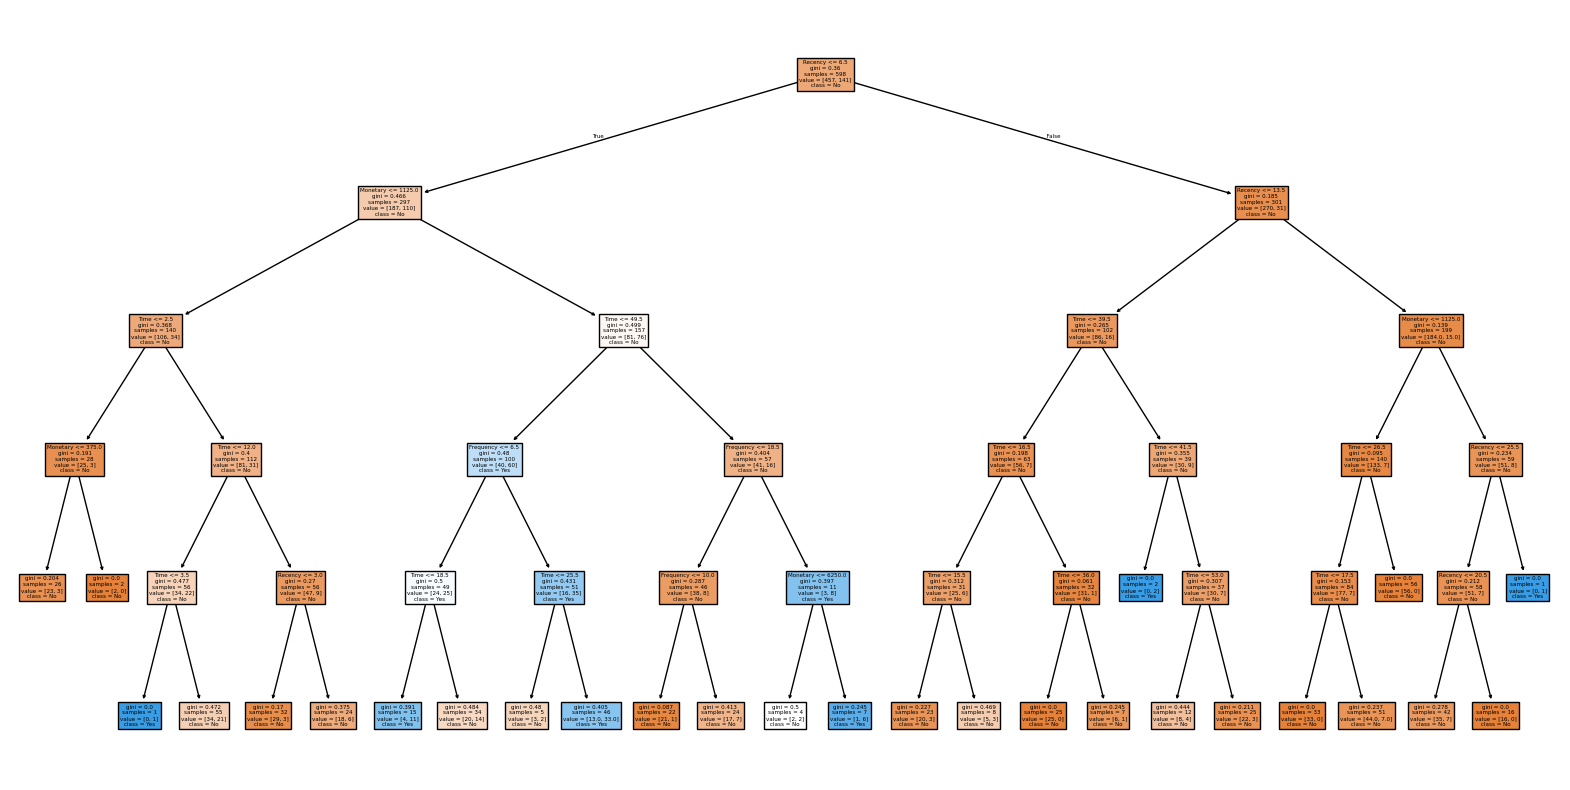

In [21]:
plt.figure(figsize = (20, 10))
tree.plot_tree(clf, filled=True, feature_names = X.columns, class_names = ['No', 'Yes'])
plt.show()

In [22]:
#Hyperparameter tuning
params = [
    {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5},
    {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10},
    {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5},
    {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}
]

In [26]:
for param in params:
    clf = DecisionTreeClassifier(criterion = param['criterion'], max_depth = param['max_depth'], 
                                 min_samples_split = param['min_samples_split'], random_state = 42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Params: , {param}")
    print(f"Accuracy: , {accuracy: .2f}")
    print(confusion_matrix(y_test, y_pred))

Params: , {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}
Accuracy: ,  0.78
[[108   5]
 [ 28   9]]
Params: , {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10}
Accuracy: ,  0.69
[[94 19]
 [27 10]]
Params: , {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5}
Accuracy: ,  0.79
[[104   9]
 [ 23  14]]
Params: , {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}
Accuracy: ,  0.72
[[100  13]
 [ 29   8]]
